## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [5]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:

#def build_mlp():
"""
Build your own model
"""
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], regularizer='l2', lx_ratio=1e-4):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    if regularizer == 'l1':
        kernel_regularizer = l1(lx_ratio)
    elif regularizer == 'l2':
        kernel_regularizer = l2(lx_ratio)
    elif regularizer == 'l1_l2':
        kernel_regularizer = l1_l2(lx_ratio)
    else:
        print('unknown regularizers')
        return
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=kernel_regularizer)(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=kernel_regularizer)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L_EXP = [1e-2, 1e-4, 1e-8]

In [11]:
#results = {}
"""
Set your training loop
"""
results = {}
regularizer = 'l1'
for regulizer_ratio in L_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with {regularizer}-regulizer = {regulizer_ratio:.1e}")
    model = build_mlp(input_shape=x_train.shape[1:],
                      output_units=10,
                      num_neurons=[512, 256, 128],
                      regularizer=regularizer,
                      lx_ratio=regulizer_ratio)

    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE,
                                     nesterov=True,
                                     momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy",
                  metrics=["accuracy"],
                  optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = f"exp-l1-{regulizer_ratio:.1e}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with l1-regulizer = 1.0e-02
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for upda

Epoch 48/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.4626 - acc: 0.0979 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.4626 - acc: 0.0988 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.4626 - acc: 0.0988 - val_loss: 2.4625 - val_acc: 0.1000
Experiment with l1-regulizer = 1.0e-04
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3

50000/50000 [==============================] - 10s 193us/step - loss: 2.7033 - acc: 0.6272 - val_loss: 3.0359 - val_acc: 0.5122
Epoch 49/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.6667 - acc: 0.6292 - val_loss: 3.0028 - val_acc: 0.5125
Epoch 50/50
50000/50000 [==============================] - 10s 192us/step - loss: 2.6300 - acc: 0.6320 - val_loss: 2.9255 - val_acc: 0.5275
Experiment with l1-regulizer = 1.0e-08
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)    

50000/50000 [==============================] - 10s 195us/step - loss: 0.9082 - acc: 0.6816 - val_loss: 1.4182 - val_acc: 0.5191
Epoch 49/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.8994 - acc: 0.6858 - val_loss: 1.4867 - val_acc: 0.5070
Epoch 50/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.8807 - acc: 0.6926 - val_loss: 1.3962 - val_acc: 0.5336


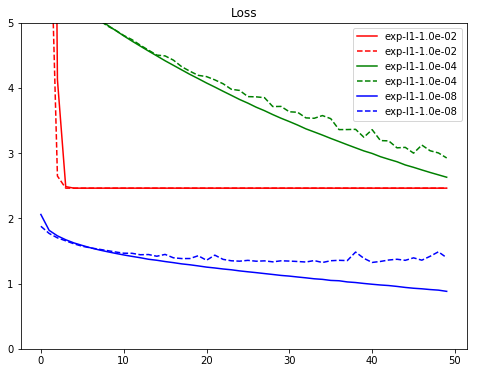

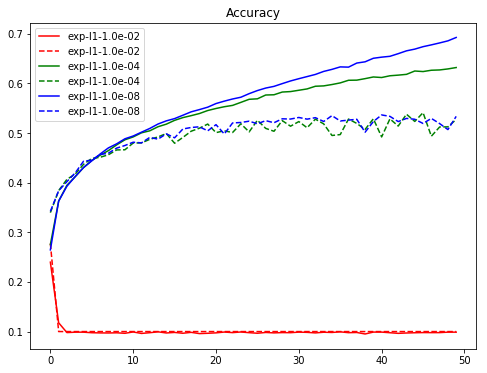

In [12]:
#import matplotlib.pyplot as plt
#%matplotlib inline
"""
plot the results
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## regularizer = 'l1_l2'

In [13]:
results = {}
regularizer = 'l1_l2'
for regulizer_ratio in L_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with {regularizer}-regulizer = {regulizer_ratio:.1e}")
    model = build_mlp(input_shape=x_train.shape[1:],
                      output_units=10,
                      num_neurons=[512, 256, 128],
                      regularizer=regularizer,
                      lx_ratio=regulizer_ratio)

    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE,
                                     nesterov=True,
                                     momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy",
                  metrics=["accuracy"],
                  optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = f"exp-l1-{regulizer_ratio:.1e}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with l1_l2-regulizer = 1.0e-02
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 277us/step - loss: 18.7835 - acc: 0.2722 - val_loss: 17.3412 - val_acc: 0.3337
Epoch 2/50
50000/50000 [==============================] - 13s 263us/step - loss: 16.1270 - acc: 0.3569 - val_loss: 14.9649 - val_acc: 0.3667
Epoch 3/50
50000/50000 [==============================] - 13s 261us/step - loss: 13.9455 - acc: 0.3778 - val_loss: 12.9593 - val_acc: 0.3884
Epoch 4/50
50000/50000 [==============================] - 13s 251us/step - loss: 12.0998 - acc: 0.3899 - val_loss: 11.2659 - val_acc: 0.3946
Epoch 5/50
50000/50000 [==============================] - 12s 245us/step - loss: 10.5302 - acc: 0.3989 - val_loss: 9.8183 - val_acc: 0.4012
Epoch 6/50
50000/50000 [==============================] - 12s 247us/step - loss: 9.1937 - acc: 0.4072 - val_loss: 8.5947 - val_acc: 0.4063
Epoch 7/50
50000/50000 [==============================] - 12s 242us/step - loss: 8.0565 - acc: 0.4126 - val

50000/50000 [==============================] - 12s 246us/step - loss: 15.0697 - acc: 0.2790 - val_loss: 13.9458 - val_acc: 0.3442
Epoch 2/50
50000/50000 [==============================] - 11s 222us/step - loss: 13.0175 - acc: 0.3619 - val_loss: 12.1273 - val_acc: 0.3758
Epoch 3/50
50000/50000 [==============================] - 12s 247us/step - loss: 11.3473 - acc: 0.3842 - val_loss: 10.5999 - val_acc: 0.3902
Epoch 4/50
50000/50000 [==============================] - 12s 242us/step - loss: 9.9340 - acc: 0.3965 - val_loss: 9.2986 - val_acc: 0.4005
Epoch 5/50
50000/50000 [==============================] - 12s 243us/step - loss: 8.7316 - acc: 0.4075 - val_loss: 8.1866 - val_acc: 0.4166
Epoch 6/50
50000/50000 [==============================] - 12s 236us/step - loss: 7.7084 - acc: 0.4163 - val_loss: 7.2438 - val_acc: 0.4265
Epoch 7/50
50000/50000 [==============================] - 12s 233us/step - loss: 6.8343 - acc: 0.4260 - val_loss: 6.4393 - val_acc: 0.4301
Epoch 8/50
50000/50000 [========

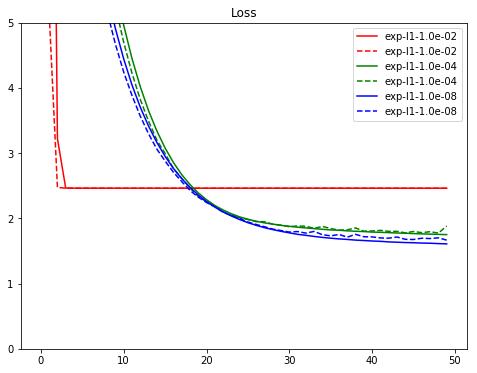

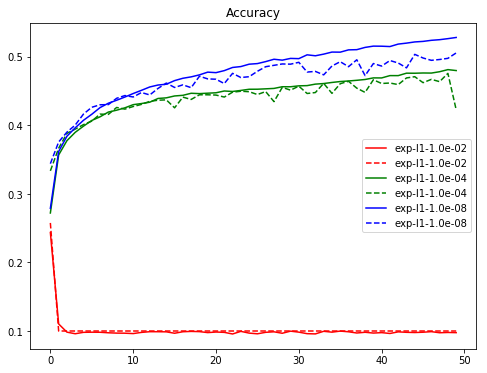

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()